## Test
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP

    * 0 個小孩  
    * 有 1 - 2 個小孩  
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩  
2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot  
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/Users/max/Downloads/application_train.csv')

In [2]:
cut_rule = [-1, 0, 2, 5, df['CNT_CHILDREN'].max()]
labels = ['0','1-2','3-5','超過5個']
df['CNT_CHILDREN_GROUP'] = pd.cut(df['CNT_CHILDREN'].values, cut_rule, 
                                  include_lowest=True, labels=labels
                                )
df['CNT_CHILDREN_GROUP'].value_counts()

0       215371
1-2      87868
3-5       4230
超過5個        42
Name: CNT_CHILDREN_GROUP, dtype: int64

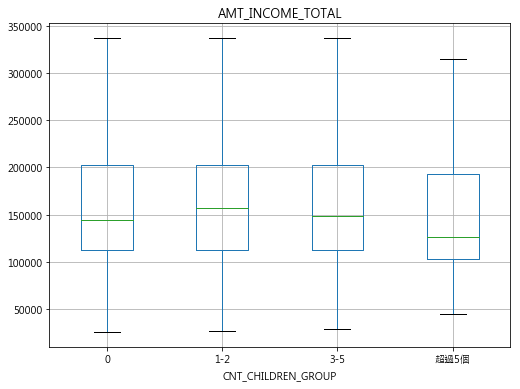

In [3]:
df.groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL'].mean()

plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(8, 6))
plt.suptitle('')
plt.show()

In [6]:
df.groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN_GROUP,,,,,,,,
0,215371.0,166288.713566,104700.345823,25650.0,112500.0,144000.0,202500.0,13500000.0
1-2,87868.0,174725.712648,411391.224507,26550.0,112500.0,157500.0,202500.0,117000000.0
3-5,4230.0,173626.303191,112929.960776,29250.0,112500.0,148500.0,202500.0,2250000.0
超過5個,42.0,147910.714286,72786.394413,45000.0,103500.0,126000.0,193500.0,337500.0
